<a id="99"></a>
# Python 8 Assignment
### Purpose: To Create and Analyze a K Nearest Neighbor Classifying Model
<b>Program Sections</b>
<ul><b>
<li><a href = "#0">Import Python Packages and Set Display</a></li>
<li><a href = "#1">Load the Data and Inspect Fields</a></li>
<li><a href = "#2">Data Evaluation and Feature Engineering</a></b>
    <ul><i>
        <li><a href = "#20">Qualitative Fields</a></li>
        <li><a href = "#21">Quantitative Fields</a></li>
        <li><a href = "#22">Feature Creation</a></li>
    </i></ul>
</li><b>
<li><a href = "#3">Save the Dataframe as a CSV File</a></li>
<li><a href = "#4">Determine Baseline Accuracy</a></li>
<li><a href = "#5">Create Training and Testing Datasets</a></li>
<li><a href = "#6">Create and Evaluate an Arbitrary K-Nearest Neighbor Classifier</a></li>
<li><a href = "#7">Search for Best Non-Weighted K-Nearest Neighbor Classifier</a></li>
<li><a href = "#8">Search for Best Weighted K-Nearest Neighbor Classifier</a></b>
    <ul><i>
        <li><a href = "#80">Predict classification for new observation</a></li>
    </i></ul>
</li><b>
<li><a href = "#9">Assignment Submission</a></li></ul>

<a id="0"></a>
### Import Python Packages and Set Display
<a href = "#99">Top</a>

In [1]:
# Code Block 0
import numpy as np 
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import datetime, socket

In [2]:
# Code Block 1
# Set display to show up to 200 columns in dataframe
pd.set_option('display.max_columns', 200) 

# Set default color palette to colorblind
plt.style.use('seaborn-colorblind')

# Set the aesthetic style of any plots 
sns.set_style('whitegrid')

<a id="1"></a>
### Load the Data and Inspect Fields
<a href = "#99">Top</a>

### Field Definition
<ul>
    <li>Client ID: Unique identifier for the customer holding the account</li>
    <li>Status: Existing or attrited customer</li>
    <li>Customer Age: Customer's age in years</li>
    <li>Gender: Customer's gender</li>
    <li>Dependents: Customer's number of dependents</li>
    <li>Education: Customer's educational achievement</li>
    <li>Marital Status: Customer's marital status</li>
    <li>Income Level: Customer's estimated annual income</li>
    <li>Card Level: Credit card classification</li>
    <li>Tenure: Period of relationship with bank in months</li>
    <li>Total Relationship Count: Total number of products held by the customer</li>
    <li>Months Inactive: Number of months inactive in the last 12 months</li>
    <li>Contacts Made: Number of contacts in the last 12 months</li>
    <li>Credit Limit: Credit limit on the credit card</li>
    <li>Total Revolving Balance: Current revolving balance on the credit card (Unpaid balance)</li>
    <li>Average Revolving Available: Average available balance open for purchases in last 12 months</li>
    <li>Trans Amount Change: Change in transaction amount over last 9 months</li>
    <li>Total Trans Amount: Total transaction Amount in last 12 months</li>
    <li>Total Trans Count: Total transaction count in lasta 12 months</li>
    <li>Trans Count Change: Change in transaction count over last 9 months</li>
    <li>Avg Utilization Ratio: Average card utilization ratio over last 12 months</li>
</ul>

In [3]:
# Code Block 2
# Read CSV file into dataframe
# Use Client ID as index as it is unique to each row
df_bank = pd.read_csv("Bank Churn Data.csv", encoding="latin1", index_col=0, header=0)

In [4]:
# Code Block 3
# Field names for easy copying
df_bank.columns

Index(['Status', 'Customer Age', 'Gender', 'Dependents', 'Education',
       'Marital Status', 'Income Level', 'Card Level', 'Tenure',
       'Total Relationship Count', 'Months Inactive', 'Contacts Made',
       'Credit Limit', 'Total Revolving Balance',
       'Average Revolving Available', 'Trans Amount Change',
       'Total Trans Amount', 'Total Trans Count', 'Trans Count Change',
       'Avg Utilization Ratio'],
      dtype='object')

In [5]:
# Code Block 4
# What does the actual data look like?
df_bank.sample(10)

,Status,Customer Age,Gender,Dependents,Education,Marital Status,Income Level,Card Level,Tenure,Total Relationship Count,Months Inactive,Contacts Made,Credit Limit,Total Revolving Balance,Average Revolving Available,Trans Amount Change,Total Trans Amount,Total Trans Count,Trans Count Change,Avg Utilization Ratio
Client ID,,,,,,,,,,,,,,,,,,,,
713398158,Existing Customer,45,M,3,Post-Graduate,Married,40K - 60K,Blue,30,2,2,2,3821.0,1673,2148.0,0.869,15005,89,0.712,0.438
781337658,Existing Customer,50,F,1,Graduate,Married,Less than 40K,Blue,44,3,1,2,2602.0,1612,990.0,0.906,5532,85,0.735,0.620
750690258,Existing Customer,49,F,2,Graduate,Married,Less than 40K,Blue,39,2,3,3,2821.0,1995,826.0,0.620,8220,103,0.635,0.707
754872333,Existing Customer,50,M,2,Graduate,Married,120K +,Blue,43,3,1,3,20114.0,0,20114.0,0.820,4740,88,0.796,0.000
708245808,Existing Customer,35,M,3,Graduate,Married,60K - 80K,Blue,36,4,1,4,19671.0,924,18747.0,0.820,13908,124,0.676,0.047
713644758,Existing Customer,49,M,3,Graduate,Single,120K +,Blue,36,6,2,3,8514.0,2013,6501.0,0.664,4098,74,0.542,0.236
714522258,Existing Customer,56,F,2,Graduate,Married,Less than 40K,Blue,48,6,3,2,4366.0,1590,2776.0,0.475,1596,37,0.423,0.364
719320833,Existing Customer,39,M,2,Post-Graduate,Married,60K - 80K,Blue,36,6,3,2,5471.0,2056,3415.0,0.465,1992,46,0.704,0.376
821797008,Attrited Customer,49,M,5,College,Married,40K - 60K,Blue,45,2,2,3,1438.3,0,1438.3,0.734,815,21,0.615,0.000


In [6]:
# Code Block 5
# Fields that are available in the dataframe and their missing values and data type
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Status                       10127 non-null  object 
 1   Customer Age                 10127 non-null  int64  
 2   Gender                       10127 non-null  object 
 3   Dependents                   10127 non-null  int64  
 4   Education                    10127 non-null  object 
 5   Marital Status               10127 non-null  object 
 6   Income Level                 10127 non-null  object 
 7   Card Level                   10127 non-null  object 
 8   Tenure                       10127 non-null  int64  
 9   Total Relationship Count     10127 non-null  int64  
 10  Months Inactive              10127 non-null  int64  
 11  Contacts Made                10127 non-null  int64  
 12  Credit Limit                 10127 non-null  float64
 13  Tota

<a id="2"></a>
### Data Evaluation and Feature Engineering
<a href = "#99">Top</a>

<a id="20"></a>
#### Qualitative Fields

In [7]:
# Code Block 6
# Evaluate target field
df_bank['Status'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Status, dtype: int64

In [8]:
# Code Block 7
# Code target variables into a binary field
def statusBinary(c):
  if c['Status'] == 'Attrited Customer':
    return 1
  else: 
    return 0

df_bank['Attrited'] = df_bank.apply(statusBinary, axis=1)

In [9]:
# Code Block 8
# Evaluate feature field
df_bank['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [10]:
# Code Block 9
# Code features into a binary field
def genderBinary(c):
  if c['Gender'] == 'M':
    return 1
  else: 
    return 0

df_bank['Gender_male'] = df_bank.apply(genderBinary, axis=1)

# Remove original field from dataframe
df_bank.drop(['Gender'], axis=1, inplace=True)

In [11]:
# Code Block 10
# Evaluate feature field
df_bank['Education'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education, dtype: int64

In [12]:
# Code Block 11
# Create one-hot encoded variables directly into dataframe
# The original field will be dropped
df_bank = pd.get_dummies(df_bank, columns=['Education'])

# Show the effect of the above command
df_bank.sample()

,Status,Customer Age,Dependents,Marital Status,Income Level,Card Level,Tenure,Total Relationship Count,Months Inactive,Contacts Made,Credit Limit,Total Revolving Balance,Average Revolving Available,Trans Amount Change,Total Trans Amount,Total Trans Count,Trans Count Change,Avg Utilization Ratio,Attrited,Gender_male,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown
Client ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
715517733,Attrited Customer,46,3,Single,Less than 40K,Silver,39,1,0,4,13092.0,1962,11130.0,0.686,936,25,0.25,0.15,1,0,0,0,0,1,0,0,0


In [13]:
# Code Block 12
# Evaluate feature field
df_bank['Marital Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital Status, dtype: int64

In [14]:
# Code Block 13
# Create one-hot encoded variables directly into dataframe
df_bank = pd.get_dummies(df_bank, columns=['Marital Status'])

In [15]:
# Code Block 14
# Evaluate feature field
df_bank['Income Level'].value_counts()

Less than 40K    3561
40K - 60K        1790
80K - 120K       1535
60K - 80K        1402
Unknown          1112
120K +            727
Name: Income Level, dtype: int64

In [16]:
# Code Block 15
# Label encode income level using defined order
def incomeCode(df):
    if df['Income Level'] == 'Less than 40K':
        return 1
    elif df['Income Level'] == '40K - 60K':
        return 2
    elif df['Income Level'] == '60K - 80K':
        return 3
    elif df['Income Level'] == '80K - 120K':
        return 4
    elif df['Income Level'] == '120K +':
        return 5
    else:
        return 0
    
df_bank['Income Level Code'] = df_bank.apply(incomeCode, axis=1)

# Drop original field from dataframe
df_bank.drop(['Income Level'], axis=1, inplace=True)

In [17]:
# Code Block 16
# Evaluate feature field
df_bank['Card Level'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card Level, dtype: int64

In [18]:
# Code Block 17
# Create one-hot encoded variables directly into dataframe
# While the order could be imputted, the relative effect of the card
# level will not be assumed to be consistent between card levels
df_bank = pd.get_dummies(df_bank, columns=['Card Level'])

<a id="21"></a>
#### Quantitative Fields

In [19]:
# Code Block 18
# Evaluate quantitative fields for outliers
df_bank.describe(percentiles=[.01, .05, .95, .99]).round(2)

,Customer Age,Dependents,Tenure,Total Relationship Count,Months Inactive,Contacts Made,Credit Limit,Total Revolving Balance,Average Revolving Available,Trans Amount Change,Total Trans Amount,Total Trans Count,Trans Count Change,Avg Utilization Ratio,Attrited,Gender_male,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,Income Level Code,Card Level_Blue,Card Level_Gold,Card Level_Platinum,Card Level_Silver
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.0,10127.00,10127.00,10127.0,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.47,0.1,0.04,0.31,0.2,0.05,0.15,0.15,0.07,0.46,0.39,0.07,2.09,0.93,0.01,0.00,0.05
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.50,0.3,0.21,0.46,0.4,0.22,0.35,0.36,0.26,0.50,0.49,0.26,1.47,0.25,0.11,0.04,0.23
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,27.00,0.00,15.00,1.00,1.00,0.00,1438.30,0.00,210.08,0.34,869.26,20.00,0.23,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,33.00,0.00,22.00,1.00,1.00,1.00,1438.51,0.00,480.30,0.46,1283.30,28.00,0.37,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00
95%,60.00,4.00,50.00,6.00,4.00,4.00,34516.00,2517.00,32183.40,1.10,14212.00,105.00,1.07,0.79,1.00,1.00,1.0,0.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,0.00,0.00,1.00
99%,65.00,5.00,56.00,6.00,6.00,5.00,34516.00,2517.00,34294.14,1.51,15882.36,123.00,1.46,0.91,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,1.00,0.00,1.00
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00


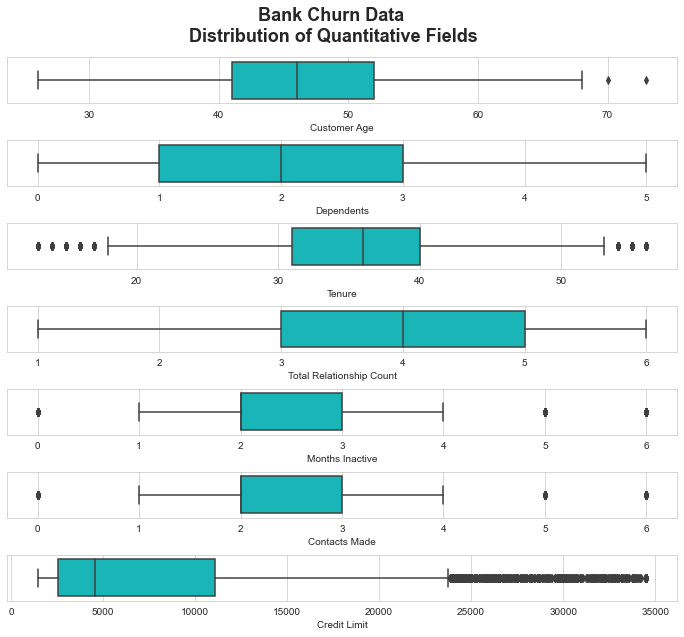

In [20]:
# Code Block 19
# Visualize the distribution of the quantitative fields
plt.figure(figsize=(12,10))

# Create sufgficient space between plots
plt.subplots_adjust(hspace=0.8)

# Set overall title for plot
plt.suptitle('Bank Churn Data\n Distribution of Quantitative Fields', fontweight='bold', 
          fontsize='18', ha='center', y=.95)

plt.subplot(711)
sns.boxplot(x='Customer Age', data=df_bank, color='darkturquoise')

plt.subplot(712)
sns.boxplot(x='Dependents', data=df_bank, color='darkturquoise')

plt.subplot(713)
sns.boxplot(x='Tenure', data=df_bank, color='darkturquoise')

plt.subplot(714)
sns.boxplot(x='Total Relationship Count', data=df_bank, color='darkturquoise')

plt.subplot(715)
sns.boxplot(x='Months Inactive', data=df_bank, color='darkturquoise')

plt.subplot(716)
sns.boxplot(x='Contacts Made', data=df_bank, color='darkturquoise')

plt.subplot(717)
sns.boxplot(x='Credit Limit', data=df_bank, color='darkturquoise')

plt.show()

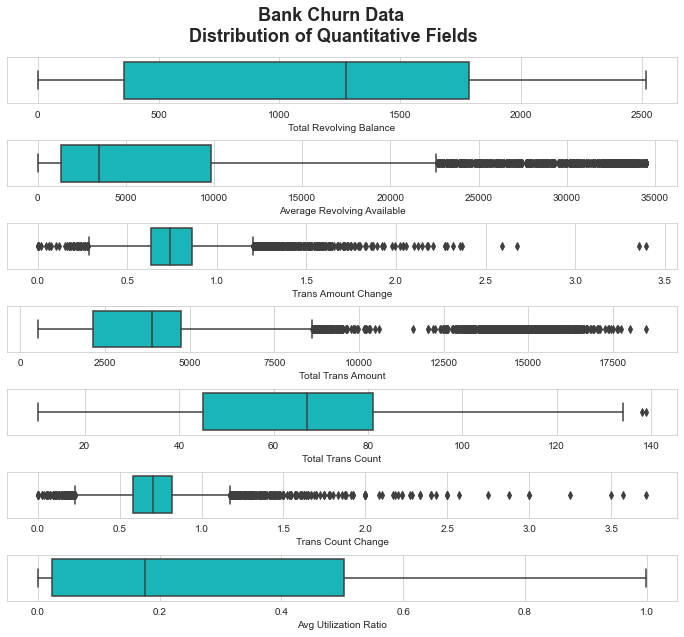

In [21]:
# Code Block 20
# Visualize the distribution of the quantitative fields
plt.figure(figsize=(12,10))

# Create sufgficient space between plots
plt.subplots_adjust(hspace=0.8)

# Set overall title for plot
plt.suptitle('Bank Churn Data\n Distribution of Quantitative Fields', fontweight='bold', 
          fontsize='18', ha='center', y=.95)

plt.subplot(711)
sns.boxplot(x='Total Revolving Balance', data=df_bank, color='darkturquoise')

plt.subplot(712)
sns.boxplot(x='Average Revolving Available', data=df_bank, color='darkturquoise')

plt.subplot(713)
sns.boxplot(x='Trans Amount Change', data=df_bank, color='darkturquoise')

plt.subplot(714)
sns.boxplot(x='Total Trans Amount', data=df_bank, color='darkturquoise')

plt.subplot(715)
sns.boxplot(x='Total Trans Count', data=df_bank, color='darkturquoise')

plt.subplot(716)
sns.boxplot(x='Trans Count Change', data=df_bank, color='darkturquoise')

plt.subplot(717)
sns.boxplot(x='Avg Utilization Ratio', data=df_bank, color='darkturquoise')

plt.show()

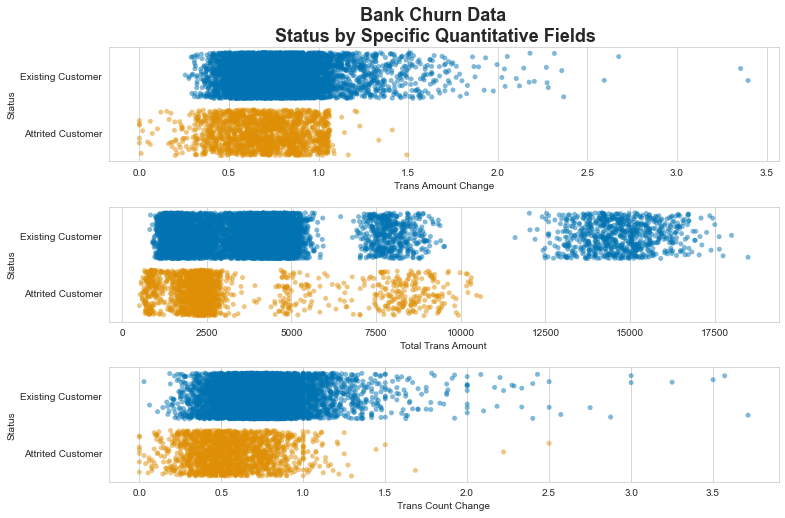

In [23]:
# Code Block 21
# Investigate relationship of target within oddly distributed quantitative fields

plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.4)

# Set overall title for plot
plt.suptitle('Bank Churn Data\n Status by Specific Quantitative Fields', fontweight='bold', 
          fontsize='18', ha='center', y=.95)

plt.subplot(311)
sns.stripplot(x='Trans Amount Change', y='Status', data=df_bank, jitter=.4, alpha=.5, palette='colorblind')

plt.subplot(312)
sns.stripplot(x='Total Trans Amount', y='Status', data=df_bank, jitter=.4, alpha=.5, palette='colorblind')


plt.subplot(313)
sns.stripplot(x='Trans Count Change', y='Status', data=df_bank, jitter=.4, alpha=.5, palette='colorblind')
plt.show()

<a id="22"></a>
#### Feature Creation

In [24]:
# Code Block 22
# Create ratio to shed light on odd distribution of total transaction amount
df_bank['Avg Trans Amount'] = df_bank['Total Trans Amount'] / df_bank['Total Trans Count']

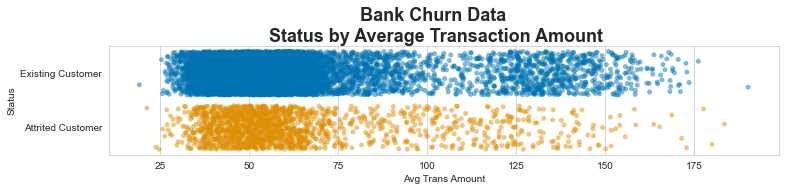

In [25]:
# Code Block 23
# Visualize the transformed feature
plt.figure(figsize=(12,2))

# Set title for plot
plt.suptitle('Bank Churn Data\n Status by Average Transaction Amount', fontweight='bold', 
          fontsize='18', ha='center', y=1.15)

sns.stripplot(x='Avg Trans Amount', y='Status', data=df_bank, jitter=.4, alpha=.5, palette='colorblind')
plt.show()

In [26]:
# Code Block 24
# Create new ratio calculations where denominator will not equal zero

# Add one to denominator to separate months into time between contacts
df_bank['Avg Months between Contacts'] = df_bank['Tenure'] / (df_bank['Contacts Made'] + 1)

df_bank['Contacts per Relationship'] = df_bank['Contacts Made'] / df_bank['Total Relationship Count']

df_bank['Trans Amt per Credit Limit'] = df_bank['Total Trans Amount'] / df_bank['Credit Limit']

df_bank['Trans Count per Credit Limit'] = df_bank['Total Trans Count'] / df_bank['Credit Limit']

df_bank['Total Rev Bal to Credit Limit'] = df_bank['Total Revolving Balance'] / df_bank['Credit Limit']

df_bank['Avail Rev Bal to Credit Limit'] = df_bank['Average Revolving Available'] / df_bank['Credit Limit']

In [28]:
# Code Block 25
# Calculate contacts made per months of customer inactivity

# Define function to error catch for zero months inactive
def contactsPerInactive(df):
  if df['Months Inactive'] == 0:
    return 0
  else: 
    return df['Contacts Made'] / df['Months Inactive']

# Apply function to dataframe
df_bank['Contacts per Inactive Mo'] = df_bank.apply(contactsPerInactive, axis=1)

# Show results of new field
df_bank['Contacts per Inactive Mo'].describe(percentiles=[.01, .05, .95, .99]).round(2)

count    10127.00
mean         1.28
std          0.89
min          0.00
1%           0.00
5%           0.25
50%          1.00
95%          3.00
99%          4.00
max          6.00
Name: Contacts per Inactive Mo, dtype: float64

In [31]:
# Code Block 26
# Calculate the ratio of changes to the transaction amount relative to the transaction count

# Define function to error catch for zero change in transaction count
def transAmtCountChange(df):
  if df['Trans Count Change'] == 0:
    return 0
  else: 
    return df['Trans Amount Change'] / df['Trans Count Change']

# Apply function to dataframe
df_bank['Trans Amt to Count Change'] = df_bank.apply(transAmtCountChange, axis=1)

# Show results of new field
df_bank['Trans Amt to Count Change'].describe(percentiles=[.01, .05, .95, .99]).round(2)

count    10127.00
mean         1.16
std          0.61
min          0.00
1%           0.48
5%           0.65
50%          1.06
95%          1.94
99%          2.78
max         31.95
Name: Trans Amt to Count Change, dtype: float64

In [32]:
# Code Block 27
# Check on all fields created and available
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Status                         10127 non-null  object 
 1   Customer Age                   10127 non-null  int64  
 2   Dependents                     10127 non-null  int64  
 3   Tenure                         10127 non-null  int64  
 4   Total Relationship Count       10127 non-null  int64  
 5   Months Inactive                10127 non-null  int64  
 6   Contacts Made                  10127 non-null  int64  
 7   Credit Limit                   10127 non-null  float64
 8   Total Revolving Balance        10127 non-null  int64  
 9   Average Revolving Available    10127 non-null  float64
 10  Trans Amount Change            10127 non-null  float64
 11  Total Trans Amount             10127 non-null  int64  
 12  Total Trans Count              101

<a id="3"></a>
### Save the Dataframe as a CSV File
<a href = "#99">Top</a>

In [33]:
# Code Block 28
# Save the dataframe as a CSV file for the next assignment
df_bank.to_csv('Bank Churn Data with features.csv', index=False)

<a id="4"></a>
### Determine Baseline Accuracy
<a href = "#99">Top</a>

In [34]:
# Code Block 29
# Baseline accuracy is if we predicted all accounts would be in the dominant class (i.e. existing)
# This is the standard that needs to be improved upon
df_bank['Status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Existing Customer    83.9%
Attrited Customer    16.1%
Name: Status, dtype: object

<a id="5"></a>
### Create Training and Testing Datasets
<a href = "#99">Top</a>

In [38]:
# Code Block 30
# Create a list of features to be utilized
X_names = df_bank.columns.values.tolist()

# Remove target fields in raw and coded form
X_names.remove('Status')
X_names.remove('Attrited')

# Create X matrix of features
X = df_bank[X_names].copy()

# Create y vector with target
y = df_bank[['Attrited']].copy()

In [39]:
# Code Block 31
# Split the data into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [40]:
# Code Block 32
# Scale the all features since distance and scale matters with K Nearest Neighbor
scaler = StandardScaler()

# Fit scaler to training features, which is all we "have" at this moment
scaler.fit(X_train)

# Apply the scaler from the training data to the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<a id="6"></a>
### Create and Evaluate an Arbitrary K-Nearest Neighbor Classifier
<a href = "#99">Top</a>

In [42]:
# Code Block 33
# Define arbitrary K-nearest neighbor model
knn_classifier = KNeighborsClassifier(n_neighbors=30, n_jobs=-2)

# Fit arbitrary model to data
knn_arbModel = knn_classifier.fit(X_train, y_train.values.ravel())

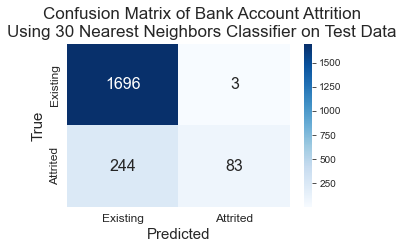

In [44]:
# Code Block 34
# Predict outcomes applying arbitrary K-nearest neighbor model on test data
y_pred_test = knn_arbModel.predict(X_test)

# Create a confusion matrix showing the predicted and true results
cm = confusion_matrix(y_test, y_pred_test)

# Create a heat map showing the results of the confusion matrix for the test data
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 3))
fig.suptitle('Confusion Matrix of Bank Account Attrition\nUsing 30 Nearest Neighbors Classifier on Test Data', 
             fontsize=17, y=1.05)
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Existing', 'Attrited'], fontsize=12)
ax.yaxis.set_ticklabels(['Existing', 'Attrited'], fontsize=12, va='center')
plt.show()

In [45]:
# Code Block 35
# result1 = classification_report(y_test, y_pred)
print("Results from 30 Nearest Neighbors Classifier - Testing Data")
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_test, y_pred_test)))
print("Report: \n", classification_report(y_test, y_pred_test, 
                                          target_names=['Existing', 'Attrited'], digits=3)) 

# Show results from training data
y_train_pred = knn_arbModel.predict(X_train) 
print("\nResults from 30 Nearest Neighbors Classifier - Training Data")
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_train, y_train_pred)))

Results from 30 Nearest Neighbors Classifier - Testing Data
Accuracy: 87.81%
Report: 
               precision    recall  f1-score   support

    Existing      0.874     0.998     0.932      1699
    Attrited      0.965     0.254     0.402       327

    accuracy                          0.878      2026
   macro avg      0.920     0.626     0.667      2026
weighted avg      0.889     0.878     0.847      2026


Results from 30 Nearest Neighbors Classifier - Training Data
Accuracy: 88.43%


<a id="7"></a>
### Search for Best Non-Weighted K-Nearest Neighbor Classifier
<a href = "#99">Top</a>

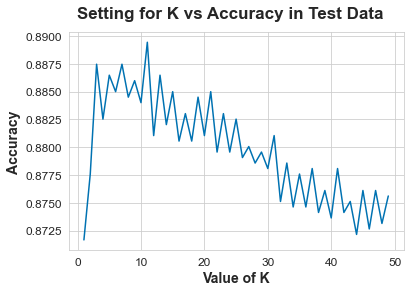

In [46]:
# Code Block 36
# Set up incremental search of values for K
range_K = range(1,50)
scores_list = []

# Fit model on each setting for K and record accuracy on testing data
for k in range_K:
   classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=-2)
   classifier.fit(X_train, y_train.values.ravel())
   y_pred = classifier.predict(X_test)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))

# Plot value for K and test data accuracy    
plt.suptitle('Setting for K vs Accuracy in Test Data', fontweight='bold', 
          fontsize='17', ha='center', y=.97)
plt.plot(range_K,scores_list)
plt.xlabel('Value of K', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12)
plt.show()

In [47]:
# Code Block 37
# Use optimal setting for K in creating K-nearest neighbor model
knn_classifier = KNeighborsClassifier(n_neighbors=11, n_jobs=-2)
knn_model = knn_classifier.fit(X_train, y_train.values.ravel())

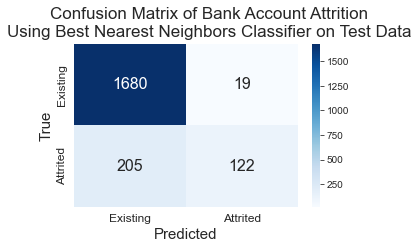

In [48]:
# Code Block 38
# Predict outcomes applying K-nearest neighbor model on test data
y_pred_test = knn_model.predict(X_test)

# Create a confusion matrix showing the predicted and true results
cm = confusion_matrix(y_test, y_pred_test)

# Create a heat map showing the results of the confusion matrix for the test data
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 3))
fig.suptitle('Confusion Matrix of Bank Account Attrition\nUsing Best Nearest Neighbors Classifier on Test Data', 
             fontsize=17, y=1.05)
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Existing', 'Attrited'], fontsize=12)
ax.yaxis.set_ticklabels(['Existing', 'Attrited'], fontsize=12, va='center')
plt.show()

In [49]:
# Code Block 39
# Show classification report on testing data for best K-nearest neighbor model
print("Results from 11 Nearest Neighbors Classifier - Testing Data")
print("Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_test)))
print("Report: \n", classification_report(y_test, y_pred_test, 
                                          target_names=['Existing', 'Attrited'], digits=3)) 

# Show results from model building on training data
y_train_pred = knn_model.predict(X_train) 
print("\nResults from 11 Nearest Neighbors Classifier - Training Data")
print("Accuracy: {:.2%}".format(accuracy_score(y_train, y_train_pred)))

Results from 11 Nearest Neighbors Classifier - Testing Data
Accuracy: 88.94%
Report: 
               precision    recall  f1-score   support

    Existing      0.891     0.989     0.938      1699
    Attrited      0.865     0.373     0.521       327

    accuracy                          0.889      2026
   macro avg      0.878     0.681     0.729      2026
weighted avg      0.887     0.889     0.870      2026


Results from 11 Nearest Neighbors Classifier - Training Data
Accuracy: 90.16%


<a id="8"></a>
### Search for Best Weighted K-Nearest Neighbor Classifier
<a href = "#99">Top</a>

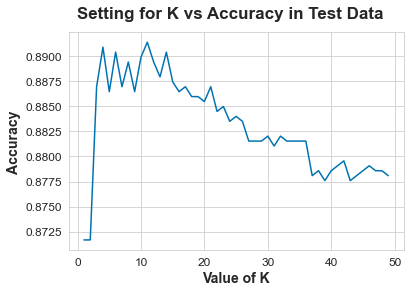

In [50]:
# Code Block 40
# Set up incremental search of values for K for a weighted distance model
range_K = range(1,50)
scores_list = []

# Fit model on each setting for K and record accuracy on testing data
for k in range_K:
   classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', n_jobs=-2)
   classifier.fit(X_train, y_train.values.ravel())
   y_pred = classifier.predict(X_test)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))

# Plot value for K and test data accuracy    
plt.suptitle('Setting for K vs Accuracy in Test Data', fontweight='bold', 
          fontsize='17', ha='center', y=.97)
plt.plot(range_K,scores_list)
plt.xlabel('Value of K', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12)
plt.show()

In [51]:
# Code Block 41
# Use optimal setting for K in creating weighted K-nearest neighbor model
knn_classifier = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-2)
knn_weighted = knn_classifier.fit(X_train, y_train.values.ravel())

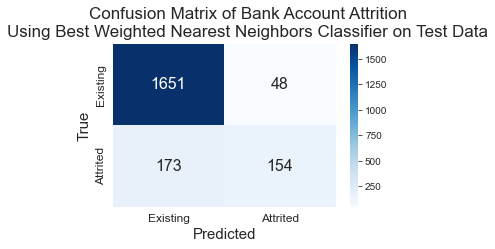

In [52]:
# Code Block 42
# Predict outcomes applying weighted K-nearest neighbor model on test data
y_pred_test = knn_weighted.predict(X_test)

# Create a confusion matrix showing the predicted and true results
cm = confusion_matrix(y_test, y_pred_test)

# Create a heat map showing the results of the confusion matrix for the test data
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 3))
fig.suptitle('Confusion Matrix of Bank Account Attrition\nUsing Best Weighted Nearest Neighbors Classifier on Test Data', 
             fontsize=17, y=1.05)
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Existing', 'Attrited'], fontsize=12)
ax.yaxis.set_ticklabels(['Existing', 'Attrited'], fontsize=12, va='center')
plt.show()

In [53]:
# Code Block 43
# Show classification report on testing data for best K-nearest neighbor model
print("Results from Best Weighted Nearest Neighbors Classifier - Testing Data")
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_test, y_pred_test)))
print("Report: \n", classification_report(y_test, y_pred_test, 
                                          target_names=['Existing', 'Attrited'], digits=3)) 

# Show results from training data
y_train_pred = knn_weighted.predict(X_train) 
print("\nResults from Best Weighted Nearest Neighbors Classifier - Training Data")
print("Accuracy: "+"{:.2%}".format(accuracy_score(y_train, y_train_pred)))

Results from Best Weighted Nearest Neighbors Classifier - Testing Data
Accuracy: 89.09%
Report: 
               precision    recall  f1-score   support

    Existing      0.905     0.972     0.937      1699
    Attrited      0.762     0.471     0.582       327

    accuracy                          0.891      2026
   macro avg      0.834     0.721     0.760      2026
weighted avg      0.882     0.891     0.880      2026


Results from Best Weighted Nearest Neighbors Classifier - Training Data
Accuracy: 100.00%


<a id="80"></a>
#### Predict classification for new observation

In [54]:
# Code Block 44
# Create empty copy of dataframe used in model
df_predNew = X.head(0).copy()

# Create a prediction probability for the following person:
# Customer is a 42-year-old college-educated and divorced male with 3 dependents that makes
# approximately $77000 per year. He has been with the bank for 2 years and has 4 accounts with
# the bank including a Blue-level credit card. He has not been inactive, and the bank has only
# contacted him 2 times. His credit limit is $16800, has a credit card balance of $1544, and has
# an average of $14400 available balance open for purchases in the past year. His transactions 
# have gone down by 28% in count and 34% in amount over the past year. He has charged a total 
# of $11,560 over 135 transactions in the past year. The average card utilization ratio has been 34%.

df_predNew.loc[0] = [42, 3, 24, 4, 0, 2, 16800, 1544, 14000, .72, 11560, 135, .66, .34, 1, 1, 0, 
                     0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 85.63, 8, .5, .688, .008, .092, .857, 0, 1.09]
df_predNew

,Customer Age,Dependents,Tenure,Total Relationship Count,Months Inactive,Contacts Made,Credit Limit,Total Revolving Balance,Average Revolving Available,Trans Amount Change,Total Trans Amount,Total Trans Count,Trans Count Change,Avg Utilization Ratio,Gender_male,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,Income Level Code,Card Level_Blue,Card Level_Gold,Card Level_Platinum,Card Level_Silver,Avg Trans Amount,Avg Months between Contacts,Contacts per Relationship,Trans Amt per Credit Limit,Trans Count per Credit Limit,Total Rev Bal to Credit Limit,Avail Rev Bal to Credit Limit,Trans Amt to Count Change,Contacts per Inactive Mo
Client ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,42.0,3.0,24.0,4.0,0.0,2.0,16800.0,1544.0,14000.0,0.72,11560.0,135.0,0.66,0.34,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,85.63,8.0,0.5,0.688,0.008,0.092,0.857,0.0,1.09


In [55]:
# Code Block 45
# Predict probabilty that customer will be retained from created weighted K-nearest neighbor model
newObs_predProb = knn_weighted.predict_proba(df_predNew)[:,0][0]
print("Probabilty that Customer will be retained: {:.2%}".format(newObs_predProb))

Probabilty that Customer will be retained: 100.00%


<a id="9"></a>
### Assignment Submission
<a href = "#99">Top</a>

## Python Assignment 8
### Name: Mark Lowe

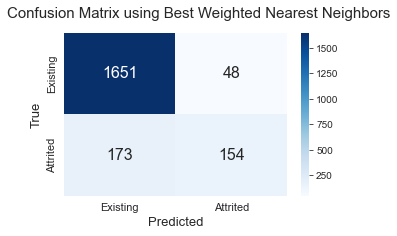

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 3))
fig.suptitle('Confusion Matrix using Best Weighted Nearest Neighbors', fontsize=15, y=1.0)
ax = plt.subplot(); sns.heatmap(cm, annot=True, cmap="Blues", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=13); ax.set_ylabel('True', fontsize=13)
ax.xaxis.set_ticklabels(['Existing', 'Attrited'], fontsize=11)
ax.yaxis.set_ticklabels(['Existing', 'Attrited'], fontsize=11, va='center'); plt.show()

### <strong>Comments on Confusion Matrix</strong>

>For the Confusion Matrix, the most critical part to Meridian would be the "Sensitivity" value (a.k.a Attrited Recall value). The reason this value is the most important is because this value represents the probability that our model accurately predicts if a customer will be attrited. The probability is 0.471 or 47.1% which is the highest probability we were able to create out of all the models we ran.

In [58]:
print(datetime.datetime.now().isoformat())
print("Your Computer Name is: " + socket.gethostname())
print("Your Computer IP Address is: " + socket.gethostbyname(socket.gethostname()))

2021-03-25T11:02:59.145914
Your Computer Name is: DESKTOP-7PJ8THV
Your Computer IP Address is: 192.168.4.36
